In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.options.display.max_columns = 1000

In [3]:
xl = pd.ExcelFile('DataSet/ICNALE_Infosheet_201912.xlsx')
xl.sheet_names

['Spoken Monologue_2.0',
 'Spoken Dialogue_1.1',
 'Written Essays_2.4',
 'Edited Essays_2.1']

In [4]:
df = pd.read_excel('DataSet/ICNALE_Infosheet_201912.xlsx', sheet_name = 'Written Essays_2.4')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 2800 non-null   object 
 1   Country              2800 non-null   object 
 2   PTJ1 (wds)           2800 non-null   int64  
 3   PTJ2 (wds)           0 non-null      float64
 4   SMK1 (wds)           2800 non-null   int64  
 5   SMK2 (wds)           0 non-null      float64
 6   Self Ev              0 non-null      float64
 7   Sex                  2800 non-null   object 
 8   Age                  2800 non-null   int64  
 9   Grade/Degree         2474 non-null   float64
 10  Yrs of Stay (< Yrs)  0 non-null      float64
 11  ENS Type             200 non-null    object 
 12  Major/ Occupation    2669 non-null   object 
 13  Acad. Genre          2569 non-null   object 
 14  Test                 1499 non-null   object 
 15  Score                1499 non-null   o

In [6]:
df.columns

Index(['Code', 'Country', 'PTJ1 (wds)', 'PTJ2 (wds)', 'SMK1 (wds)',
       'SMK2 (wds)', 'Self Ev', 'Sex', 'Age', 'Grade/Degree',
       'Yrs of Stay (< Yrs)', 'ENS Type', 'Major/ Occupation', 'Acad. Genre',
       'Test', 'Score', 'VST', 'CEFR', 'INTM', 'INSM', 'INTM+INSM',
       'INTM-INSM', 'Primary', 'Secondary', 'College', 'Inschool', 'Outschool',
       'Listening', 'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation',
       'Presentation', 'EssayW'],
      dtype='object')

In [7]:
df.Country.unique()

array(['CHN', 'ENS_AUS', 'ENS_GBR', 'ENS_NZL', 'ENS_USA', 'ENS_CAN',
       'HKG', 'IDN', 'JPN', 'KOR', 'PAK', 'PHL', 'SIN', 'THA', 'TWN'],
      dtype=object)

In [8]:
eng_countries = ['ENS_AUS', 'ENS_GBR', 'ENS_NZL', 'ENS_USA', 'ENS_CAN']

df = df[~df.Country.isin(eng_countries)]

In [9]:
df.shape

(2600, 35)

In [10]:
df = df.drop(['PTJ2 (wds)', 'SMK2 (wds)', 'Self Ev', 'Yrs of Stay (< Yrs)', 'ENS Type', 'INTM+INSM', 'INTM-INSM'], axis=1)

In [11]:
temp = {}
for c in df.columns:
    temp[c] = df[c].nunique()
print(temp)

{'Code': 2600, 'Country': 10, 'PTJ1 (wds)': 157, 'SMK1 (wds)': 150, 'Sex': 7, 'Age': 18, 'Grade/Degree': 7, 'Major/ Occupation': 136, 'Acad. Genre': 4, 'Test': 20, 'Score': 309, 'VST': 41, 'CEFR': 4, 'INTM': 30, 'INSM': 33, 'Primary': 12, 'Secondary': 42, 'College': 43, 'Inschool': 43, 'Outschool': 47, 'Listening': 21, 'Reading': 21, 'Speaking': 22, 'Writing': 22, 'NS': 9, 'Pronunciation': 8, 'Presentation': 8, 'EssayW': 8}


In [12]:
df = df.rename(columns={'PTJ1 (wds)':'PTJ1', 'SMK1 (wds)':'SMK1', 'Grade/Degree':'Grade', 'Major/ Occupation':'Major', 'Acad. Genre':'Field'})

In [13]:
round(df.isna().sum()/df.shape[0]*100, 2)

Code              0.00
Country           0.00
PTJ1              0.00
SMK1              0.00
Sex               0.00
Age               0.00
Grade             4.85
Major             4.00
Field             4.00
Test             42.35
Score            42.35
VST               0.00
CEFR              0.00
INTM             12.08
INSM             12.08
Primary          12.04
Secondary        12.04
College          12.04
Inschool         12.04
Outschool        12.04
Listening        12.04
Reading          12.04
Speaking         12.04
Writing          12.04
NS               12.04
Pronunciation    12.04
Presentation     12.04
EssayW           12.04
dtype: float64

In [14]:
num_cols = ['Score', 'NS', 'Pronunciation', 'Presentation', 'EssayW']

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [15]:
df.dtypes

Code              object
Country           object
PTJ1               int64
SMK1               int64
Sex               object
Age                int64
Grade            float64
Major             object
Field             object
Test              object
Score            float64
VST              float64
CEFR              object
INTM             float64
INSM             float64
Primary          float64
Secondary        float64
College          float64
Inschool         float64
Outschool        float64
Listening        float64
Reading          float64
Speaking         float64
Writing          float64
NS               float64
Pronunciation    float64
Presentation     float64
EssayW           float64
dtype: object

In [16]:
df.Sex.unique()

array(['F', 'M', 'M ', 'F ', 'm', 'f', ' F'], dtype=object)

In [17]:
df.Sex = df.Sex.replace(['F ', 'f', ' F'], 'F')
df.Sex = df.Sex.replace(['M ', 'm'],'M')

In [18]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [19]:
df.isna().sum()

Code                0
Country             0
PTJ1                0
SMK1                0
Sex                 0
Age                 0
Grade             126
Major             104
Field             104
Test             1101
Score            1319
VST                 0
CEFR                0
INTM              314
INSM              314
Primary           313
Secondary         313
College           313
Inschool          313
Outschool         313
Listening         313
Reading           313
Speaking          313
Writing           313
NS                314
Pronunciation     314
Presentation      314
EssayW            314
dtype: int64

In [20]:
df.Grade = df.Grade.fillna('N/A')
df.Grade = df.Grade.astype(str)
df.Grade.unique()

array(['2.0', '3.0', '1.0', '4.0', 'N/A', '7.0', '5.0', '6.0'],
      dtype=object)

In [21]:
df.Major = df.Major.fillna('N/A')
df.Field = df.Field.fillna('N/A')

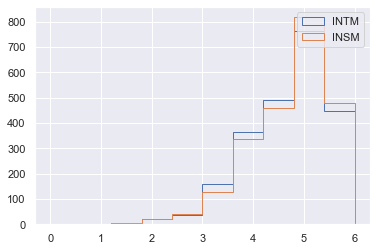

In [22]:
sns.set()
_ = plt.hist(df.INTM, histtype='step', label='INTM')
_ = plt.hist(df.INSM, histtype='step', label='INSM')
plt.legend()
plt.show()

In [23]:
df.INTM.corr(df.INSM)

0.4398844705406561

In [24]:
df.INTM.median(), df.INSM.median(), df.INTM.mean(), df.INSM.mean()

(4.83, 4.83, 4.705170603674543, 4.7484558180227445)

In [25]:
df.INTM = df.INTM.fillna(df.INTM.median())
df.INSM = df.INSM.fillna(df.INSM.median())

In [26]:
df.columns

Index(['Code', 'Country', 'PTJ1', 'SMK1', 'Sex', 'Age', 'Grade', 'Major',
       'Field', 'Test', 'Score', 'VST', 'CEFR', 'INTM', 'INSM', 'Primary',
       'Secondary', 'College', 'Inschool', 'Outschool', 'Listening', 'Reading',
       'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation', 'EssayW'],
      dtype='object')

3.0 3.1464801049409705


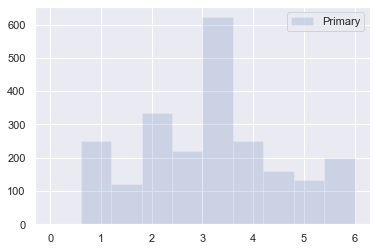

3.75 3.733170091823371


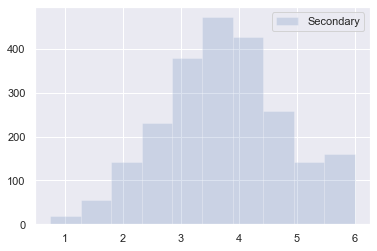

4.25 4.1426934849147115


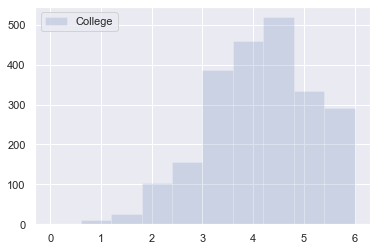

4.11 4.0908395277656355


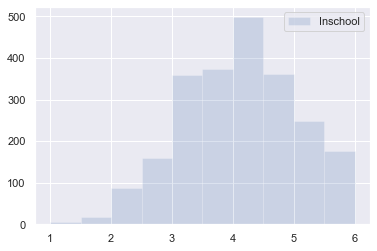

3.56 3.605452557936166


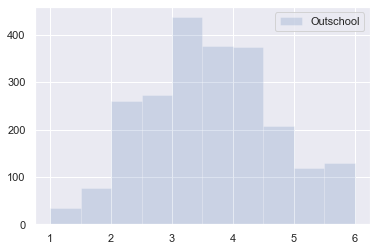

4.25 4.141123742894622


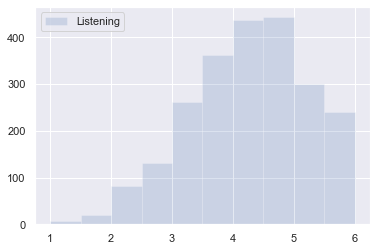

4.25 4.1815697420201134


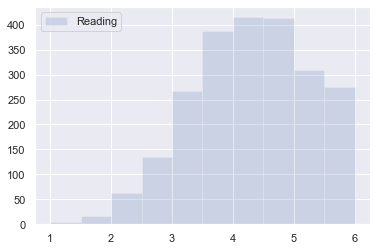

3.5 3.5860297332750326


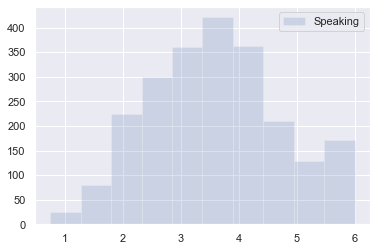

3.75 3.834643637953651


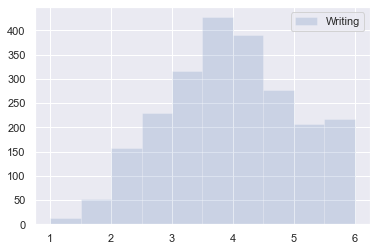

4.0 3.984251968503937


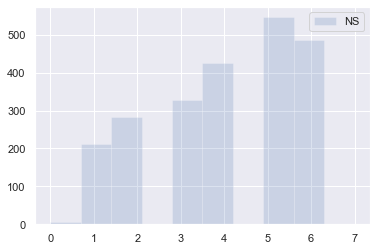

5.0 4.278652668416448


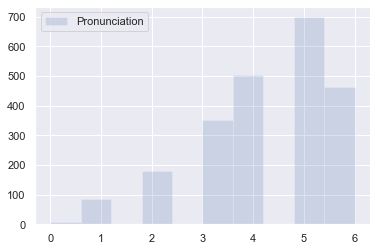

4.0 4.268153980752406


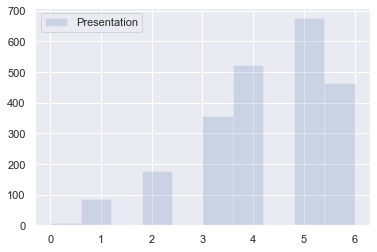

5.0 4.229221347331584


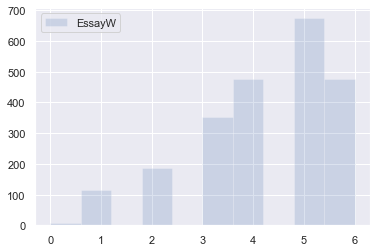

In [27]:
cols = ['Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening', 'Reading',
       'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation', 'EssayW']

for c in cols:
    _ = plt.hist(df[c], alpha=0.2, label=c)
    print(df[c].median(), df[c].mean())
    plt.legend()
    plt.show()

In [28]:
for c in cols:
    df[c] = df[c].fillna(df[c].median())

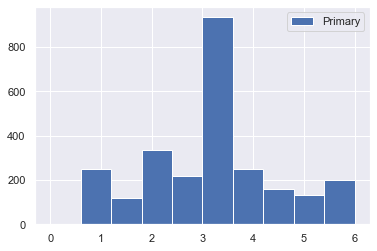

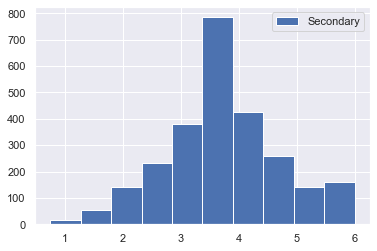

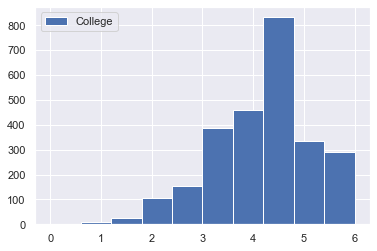

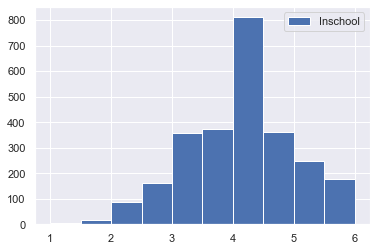

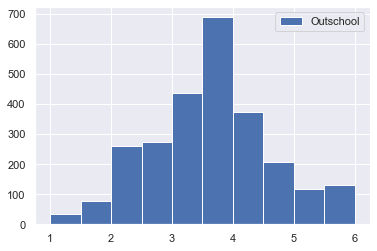

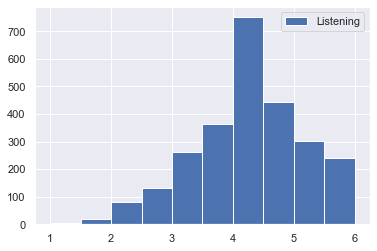

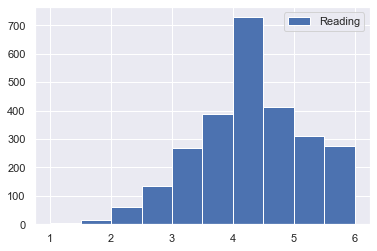

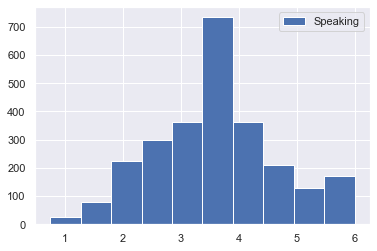

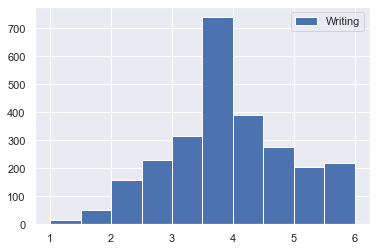

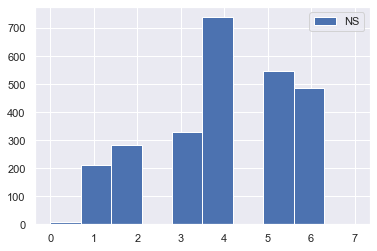

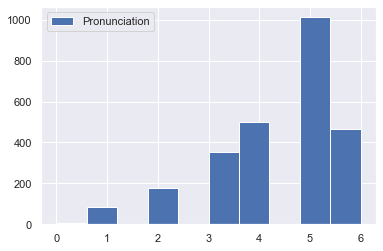

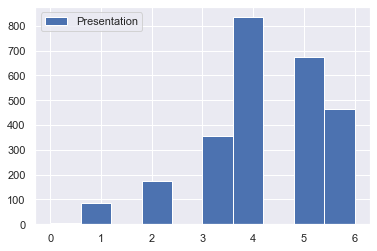

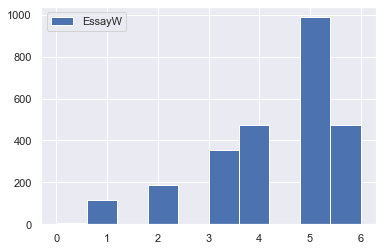

In [30]:
for c in cols:
    _ = plt.hist(df[c], label=c)
    plt.legend()
    plt.show()

In [31]:
df.isna().sum()

Code                0
Country             0
PTJ1                0
SMK1                0
Sex                 0
Age                 0
Grade               0
Major               0
Field               0
Test             1101
Score            1319
VST                 0
CEFR                0
INTM                0
INSM                0
Primary             0
Secondary           0
College             0
Inschool            0
Outschool           0
Listening           0
Reading             0
Speaking            0
Writing             0
NS                  0
Pronunciation       0
Presentation        0
EssayW              0
dtype: int64

In [34]:
for key, group in df.groupby('Test'):
    df[key] = group.Score
    print(key, ': ', df[key].nunique())

A Level (General Paper) :  0
CEE :  39
CSEPT :  4
Cambridg O Level :  0
Cambridge :  0
HKALE :  0
IELTS :  6
IEPT :  1
NAT :  1
NCAE :  1
NCAT :  0
NMET :  5
O Level (Eng Lang) :  0
ONET :  98
SAT :  1
TEPS :  17
TOEFL (PBT) :  21
TOEFL (iBT) :  26
TOEIC :  126
UPCAT :  1


In [36]:
tests_to_drop = ['A Level (General Paper)', 'CSEPT', 'Cambridg O Level',
       'Cambridge', 'HKALE', 'IELTS', 'IEPT', 'NAT', 'NCAE', 'NCAT', 'NMET',
       'O Level (Eng Lang)', 'SAT', 'TEPS', 'TOEFL (PBT)',
       'TOEFL (iBT)', 'UPCAT']
df = df.drop(tests_to_drop, axis=1)

In [37]:
df.columns

Index(['Code', 'Country', 'PTJ1', 'SMK1', 'Sex', 'Age', 'Grade', 'Major',
       'Field', 'Test', 'Score', 'VST', 'CEFR', 'INTM', 'INSM', 'Primary',
       'Secondary', 'College', 'Inschool', 'Outschool', 'Listening', 'Reading',
       'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation', 'EssayW',
       'CEE', 'ONET', 'TOEIC'],
      dtype='object')

In [38]:
for test in ['CEE', 'ONET', 'TOEIC']:
    df[test + '_isna'] = df[test].isna().astype(int)
    df[test] = df[test].fillna(0)

In [39]:
df = df.drop(['Test', 'Score'], axis=1)

In [40]:
df.isna().sum()

Code             0
Country          0
PTJ1             0
SMK1             0
Sex              0
Age              0
Grade            0
Major            0
Field            0
VST              0
CEFR             0
INTM             0
INSM             0
Primary          0
Secondary        0
College          0
Inschool         0
Outschool        0
Listening        0
Reading          0
Speaking         0
Writing          0
NS               0
Pronunciation    0
Presentation     0
EssayW           0
CEE              0
ONET             0
TOEIC            0
CEE_isna         0
ONET_isna        0
TOEIC_isna       0
dtype: int64

In [42]:
df.to_csv('Data/210907_Essay_score_cleaned_2.csv')